In [1]:
from audio_ot import *

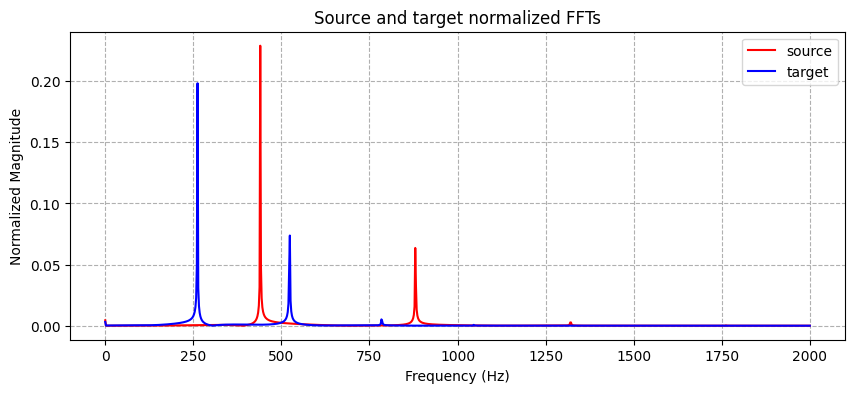

In [2]:
sr = 44100
duration = 0.5
smooth_len = 100
max_frequency = 2000

source_path = 'sounds/digital/A3.wav'
target_path = 'sounds/digital/C3.wav'

source_signal = load_signal(source_path, sr=sr, duration=duration, smooth_len=smooth_len)
target_signal = load_signal(target_path, sr=sr, duration=duration, smooth_len=smooth_len)

source_fft, support = fft_normalized(source_signal, sr=sr, return_support=True, max_frequency=max_frequency)
target_fft = fft_normalized(target_signal, sr=sr, max_frequency=max_frequency)

plot_signals(support, signals=[source_fft, target_fft], labels=['source', 'target'], title='Source and target normalized FFTs', colors=['r', 'b'])

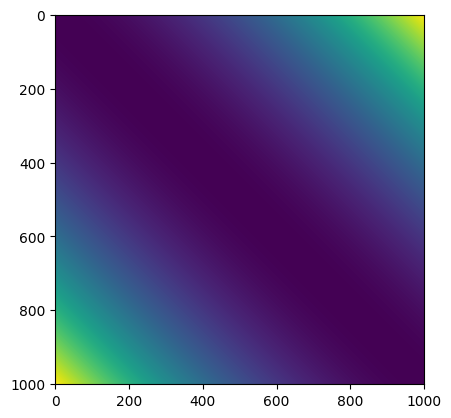

In [3]:
# Optimal transport

alpha = 0.5

dist = lambda x, y: np.sqrt((x-y)**2)
dist = lambda x, y: np.abs(x-y)
dist = lambda x, y: (x-y)**2

M = cost_matrix(support, dist=dist)

plt.imshow(M)


In [4]:
interpolation, plan = emd(support, source_fft, target_fft, M, alpha)


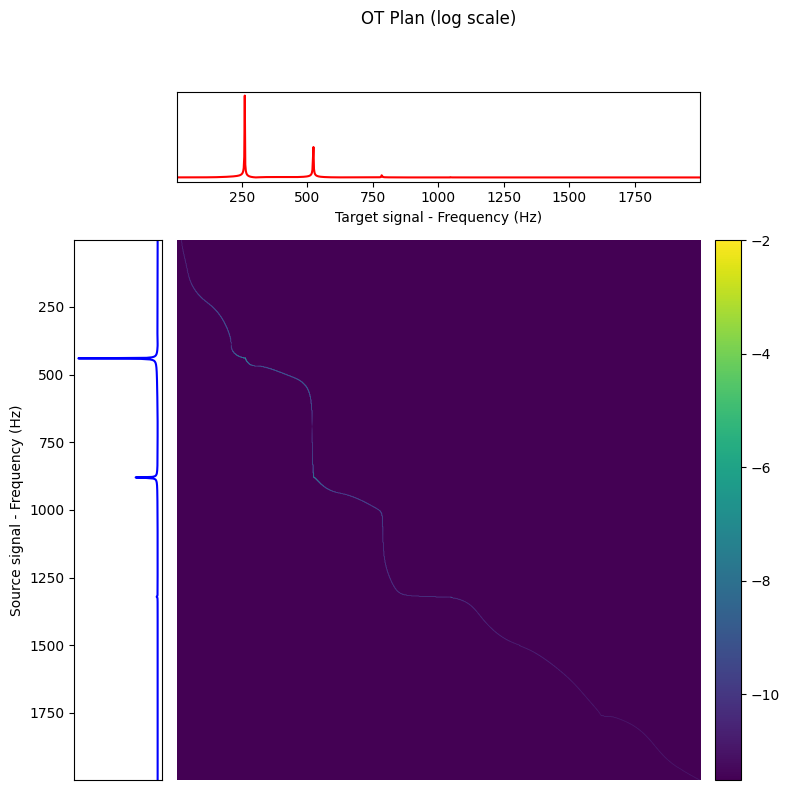

In [5]:
source_freq_start=0
source_freq_end=-1
target_freq_start=0
target_freq_end=-1
plot_plan_spectra(support, 
                  source_fft, 
                  target_fft, 
                  plan, 
                  source_freq_start=source_freq_start, 
                  source_freq_end=source_freq_end, 
                  target_freq_start=target_freq_start, 
                  target_freq_end=target_freq_end, 
                  log=True, 
                  epsilon=1e-5)


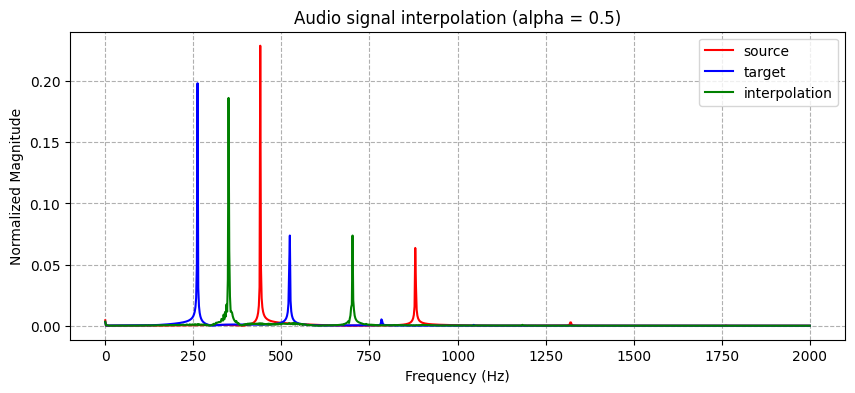

In [6]:
plot_signals(support, signals=[source_fft, target_fft, interpolation], labels=['source', 'target', 'interpolation'], title=f'Audio signal interpolation (alpha = {alpha})', colors=['r', 'b', 'g'])

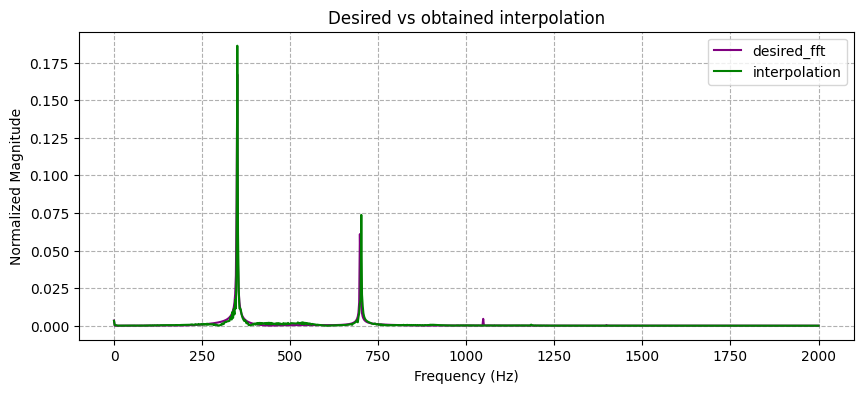

In [7]:

desired_interpolation = 'sounds/digital/F3.wav'

desired_signal = load_signal(desired_interpolation, sr=sr, duration=duration, smooth_len=smooth_len)

desired_fft = fft_normalized(desired_signal, sr=sr, return_support=False, max_frequency=max_frequency)

plot_signals(support, signals=[desired_fft, interpolation], labels=['desired_fft', 'interpolation'], title='Desired vs obtained interpolation', colors=['purple', 'g'])